In [8]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import pylab
from scipy.stats import shapiro
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

In [2]:
times = np.array([17,160,234,149,145,107,197,75,201,225,211,119,157,145,127,244,163,114,145,65,112,185,202,146,203,224,203,114,188,156,187,154,177,95,165,50,110,216,138,151,166,135,155,84,251,173,131,207,121,120])

In [4]:
stats.describe(times)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

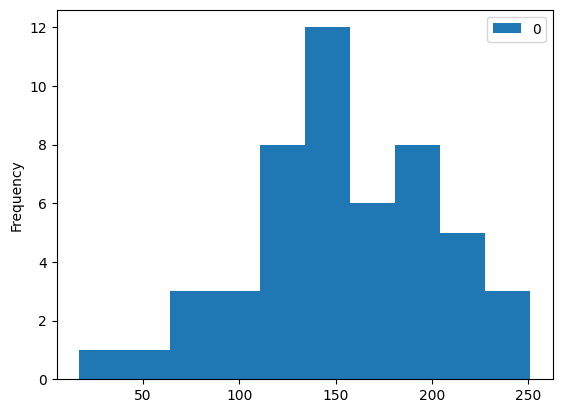

In [6]:
#histogram
pd.DataFrame(times).plot.hist();

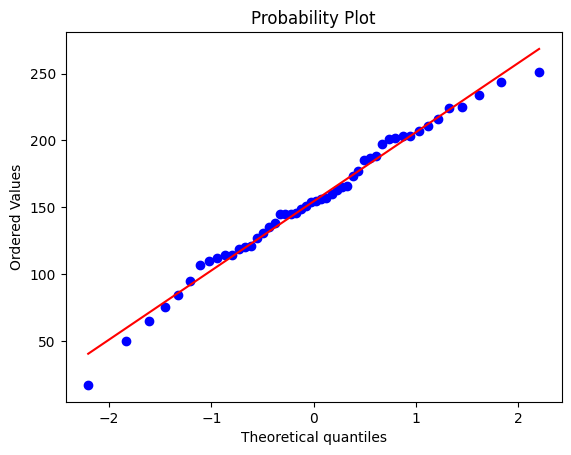

In [8]:
#qqplot
stats.probplot(times, dist="norm", plot=pylab)
pylab.show()

In [13]:
#Shapiro-Wilks Testi
print("Test Statistic: ", shapiro(times)[0])
print("p-value: ", shapiro(times)[1])

Test Statistic:  0.9853101372718811
p-value:  0.7848551869392395


In [14]:
#t-test
stats.ttest_1samp(times, popmean= 170)
# because p-value is less than 0.05, we reject the null hypothesis and conclude that the mean time is different from 170.

TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

In [16]:
#non-parametric one-sample test
sign_test(times, 170)


(-7.0, 0.06490864707227217)

In [3]:
#one sample proportion test
count = 40
nobs = 500
value = 0.125

print("Test Statistic: ", proportions_ztest(count, nobs, value)[0])
print("p-value: ", proportions_ztest(count, nobs, value)[1])


Test Statistic:  -3.7090151628513017
p-value:  0.0002080669689845979


In [5]:
#independent two sample t-test
#create A dataframe array about 30 elements between 20-30
A = np.random.randint(20,30,30)
#create B dataframe array about 30 elements between 20-30
B = np.random.randint(20,30,30)

A_B = pd.concat([pd.DataFrame(A), pd.DataFrame(B)], axis=1)
A_B.columns = ["A", "B"]

A_B.head()


,A,B
0,22,26
1,29,23
2,20,21
3,29,23
4,26,23


In [11]:
A = np.random.randint(25,43,30)
B = np.random.randint(14,28,30)

#A and group A
A = pd.DataFrame(A)
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "A"
A = pd.concat([A, GROUP_A], axis=1)

#B and group B
B = pd.DataFrame(B)
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "B"
B = pd.concat([B, GROUP_B], axis=1)

#concatenate A and B
AB = pd.concat([A, B])
AB.columns = ["value", "group"]
print(AB.head())
print(AB.tail())

   value group
0     35     A
1     31     A
2     27     A
3     37     A
4     42     A
    value group
25     27     B
26     18     B
27     18     B
28     15     B
29     15     B


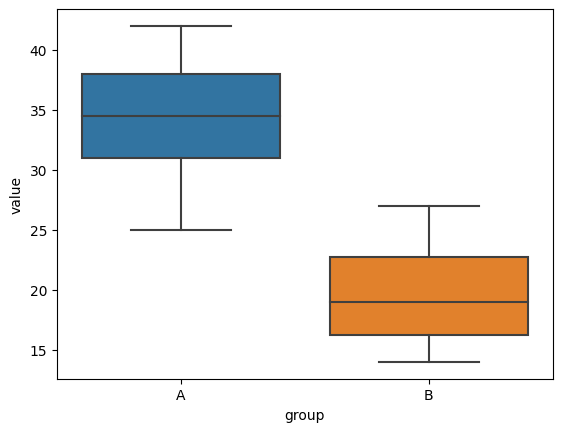

In [12]:
sns.boxplot(x = "group", y = "value", data = AB);

In [17]:
#normality assumption
shapiro(A_B.A)

ShapiroResult(statistic=0.9170444011688232, pvalue=0.022495821118354797)

In [14]:
#normality assumption
shapiro(A_B.B)

ShapiroResult(statistic=0.9400075078010559, pvalue=0.09100117534399033)

In [15]:
#assumption of homogeneity of variance
#H0 = variances are equal
#H1 = variances are not equal
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=0.4458151451888412, pvalue=0.506977187335615)

In [19]:
#Hyphotesis test
test_statistic, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)
print("Test Statistic = %.4f, p-value = %.4f" % (test_statistic, pvalue))

Test Statistic = 1.8038, p-value = 0.0765


In [20]:
#non-parametric test
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=574.5, pvalue=0.06509125248666511)

In [49]:
#dependent two sample t-test
before = np.random.randint(115,125,30)
after = before + np.random.randint(7,12,30)
before = pd.DataFrame(before)
after = pd.DataFrame(after)

In [50]:
indep = pd.concat([before, after], axis=1)
indep.columns = ["before", "after"]
print("'indep' data set: \n\n", indep.head(), "\n\n")

'indep' data set: 

    before  after
0     124    134
1     121    129
2     121    129
3     116    127
4     123    134 




In [51]:
group_before = np.arange(len(before))
group_before = pd.DataFrame(group_before)
group_before[:] = "before"
A = pd.concat([before, group_before], axis=1)

group_after = np.arange(len(after))
group_after = pd.DataFrame(group_after)
group_after[:] = "after"
B = pd.concat([after, group_after], axis=1)

AB = pd.concat([A, B])
AB.columns = ["performance", "before_after"]
print("'AB' data set: \n\n", AB.head(), "\n")

'AB' data set: 

    performance before_after
0          124       before
1          121       before
2          121       before
3          116       before
4          123       before 



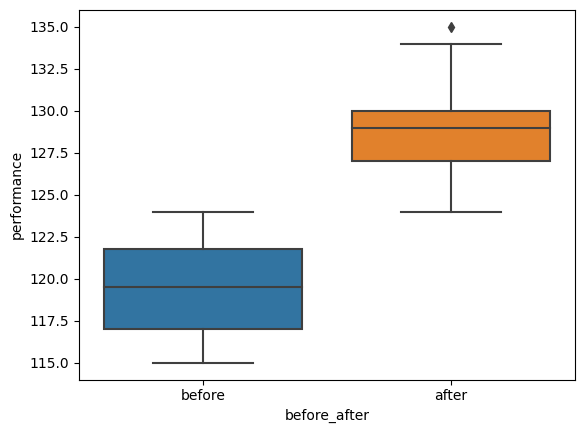

In [52]:
sns.boxplot(x = "before_after", y = "performance", data = AB);

In [53]:
#dependent two sample t-test
print(shapiro(indep.before))
print(shapiro(indep.after))

ShapiroResult(statistic=0.9408854246139526, pvalue=0.09609410911798477)
ShapiroResult(statistic=0.9439340233802795, pvalue=0.11611175537109375)


In [54]:
#assumption of homogeneity of variance
stats.levene(indep.before, indep.after)

LeveneResult(statistic=0.2838593687574911, pvalue=0.5962182304689556)

In [55]:
#Hyphotesis test
print("Test Statistic: = %.4f, p-value = %.4f" % stats.ttest_rel(indep.before, indep.after))

Test Statistic: = -34.2087, p-value = 0.0000


In [56]:
#non-parametric test
test_statistic, pvalue = stats.wilcoxon(indep["before"], indep["after"])
print("Test Statistic: = %.4f, p-value = %.4f" % (test_statistic, pvalue))

Test Statistic: = 0.0000, p-value = 0.0000
